In [ ]:
import pandas as pd
iris = pd.read_csv('iris.csv')
train_iris = iris.sample(frac = 0.6, random_state = 1)
test_iris = iris.drop(train_iris.index)
train_iris.index = list(range(len(train_iris)))

Understand the problem and data:
Conduct exploratory analysis by making a plot to compare each potential predictor variable with
the appropriate response variable. Comment on each relationship

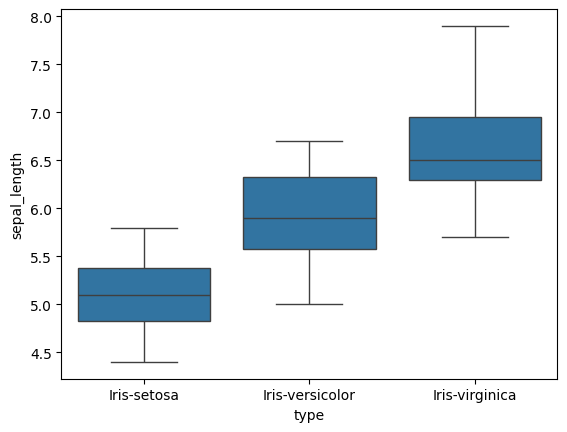

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y=train_iris['sepal_length'], x=train_iris['type'])
plt.xlabel('type')
plt.ylabel('sepal_length')
plt.show()

It appears that the setosa has the lowest median sepal length, the virginica has the highest median sepal length, and the veriscolor inbetween.

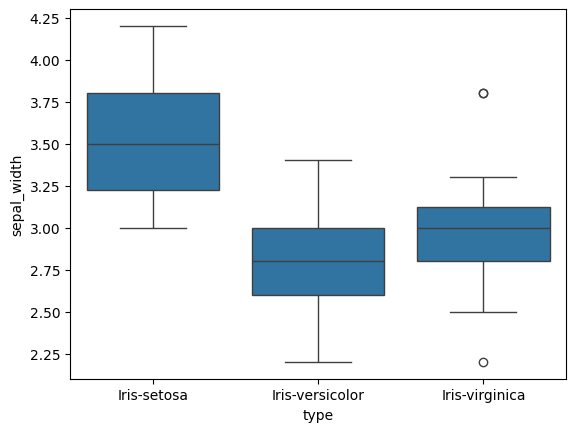

In [ ]:
sns.boxplot(y=train_iris['sepal_width'], x=train_iris['type'])
plt.xlabel('type')
plt.ylabel('sepal_width')
plt.show()

The setosa appears to have the highest median sepal width, the versicolor has the lowest median sepal width, and the virginica slightly above the versicolor.

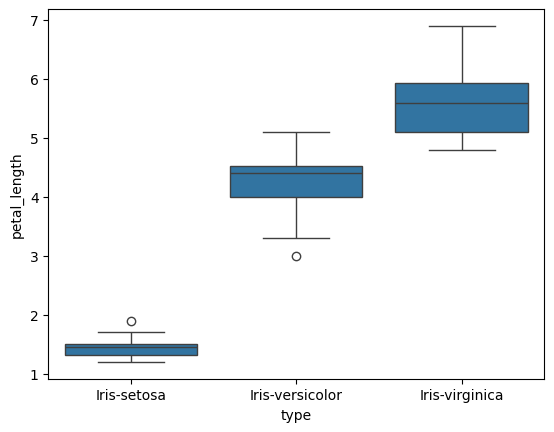

In [ ]:
sns.boxplot(y=train_iris['petal_length'], x=train_iris['type'])
plt.xlabel('type')
plt.ylabel('petal_length')
plt.show()

The setosa appears to have a much lower petal median petal length, while the virginica has the largest median petal length with the versicolor not far below.

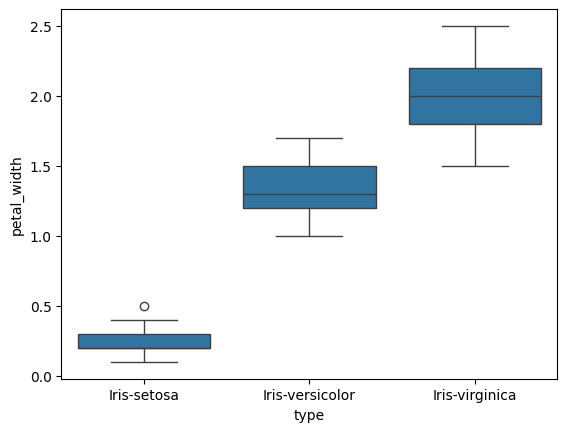

In [ ]:
sns.boxplot(y=train_iris['petal_width'], x=train_iris['type'])
plt.xlabel('type')
plt.ylabel('petal_width')
plt.show()

Again we see the setosa much lower than the versicolor and virginica in terms of petal median width. Along with the virginica having the largest petal width, and the versicolor being close behind.

Model Specification: Conduct exploratory analysis by making a single plot of the training data that relates the two
predictors specifying the type of iris for each observation. Comment on the visualization in the
context of the goal of your analysis.
– Choose one of the profiles based on the plots and defend your choice


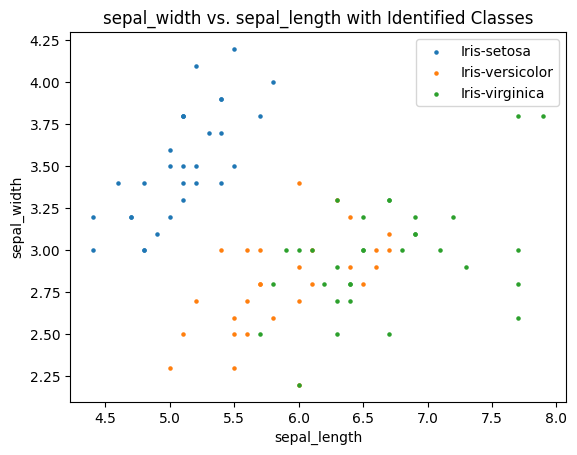

In [ ]:
def Make_2D_Plot_with_Class_Identification(data, xVar, yVar, Class):
    '''
    Inputs:
        data3 = dataframe
        xVar = variable in data that should be placed on the x-axis of the plot
        yVar = variable in data that should be placed on the y-axis of the plot
        Class = variable in data that assigns the class of each observation
    Output:
         Scatter plot with xVar on x-axis, yVar on y-axis, and color identification indicating class
    '''
    for group_id, group_members in data.groupby(Class):
      plt.scatter(group_members[xVar], group_members[yVar], s = 5, label = group_id)
    plt.xlabel(xVar)
    plt.ylabel(yVar)
    plt.title(yVar + ' vs. ' + xVar +' with Identified Classes')
    plt.legend()

Make_2D_Plot_with_Class_Identification(train_iris, 'sepal_length', 'sepal_width', 'type')

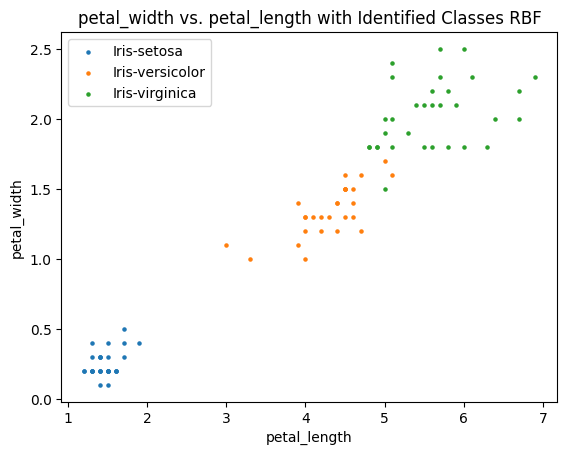

In [ ]:
def Make_2D_Plot_with_Class_Identification(data, xVar, yVar, Class):
    '''
    Inputs:
        data3 = dataframe
        xVar = variable in data that should be placed on the x-axis of the plot
        yVar = variable in data that should be placed on the y-axis of the plot
        Class = variable in data that assigns the class of each observation
    Output:
         Scatter plot with xVar on x-axis, yVar on y-axis, and color identification indicating class
    '''
    for group_id, group_members in data.groupby(Class):
      plt.scatter(group_members[xVar], group_members[yVar], s = 5, label = group_id)
    plt.xlabel(xVar)
    plt.ylabel(yVar)
    plt.title(yVar + ' vs. ' + xVar +' with Identified Classes RBF')
    plt.legend()

Make_2D_Plot_with_Class_Identification(train_iris, 'petal_length', 'petal_width', 'type')

Tune the choice

In [ ]:
#Linear
train_predictor_variables = train_iris[['petal_length', 'petal_width']]
from sklearn import svm
from sklearn.model_selection import GridSearchCV
train_predictor_variables = train_iris[['petal_length', 'petal_width']]
parameters = {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
est = svm.SVC()
tuning = GridSearchCV(est, parameters, cv = 5)
tuning_output_linear = tuning.fit(train_predictor_variables, train_iris['type'])
tuning_output_linear.best_params_

{'C': 100, 'kernel': 'linear'}

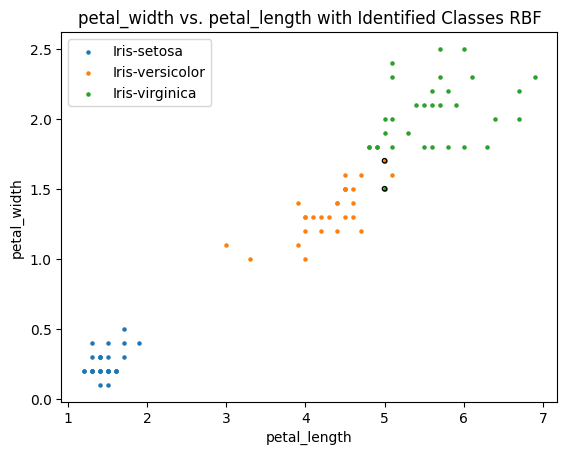

In [ ]:
Make_2D_Plot_with_Class_Identification(train_iris, 'petal_length', 'petal_width', 'type')

best_model_linear = tuning_output_linear.best_estimator_
for i in range(len(train_iris)):
  observation_data = {'petal_length': [train_iris['petal_length'][i]],
                      'petal_width': [train_iris['petal_width'][i]]}
  train_obs = pd.DataFrame(observation_data)
  observation_target =  train_iris['type'][i]
  if best_model_linear.predict(train_obs) != observation_target:
    plt.scatter(train_obs['petal_length'], train_obs['petal_width'], color = 'black', facecolors='none', s = 10)

In [ ]:
#Polynomial
train_predictor_variables = train_iris[['petal_length', 'petal_width']]
parameters = {'kernel': ['poly'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'degree': [2, 3, 4]}
est = svm.SVC()
tuning = GridSearchCV(est, parameters, cv = 5)
tuning_output_poly = tuning.fit(train_predictor_variables, train_iris['type'])
tuning_output_poly.best_params_

{'C': 1, 'degree': 3, 'kernel': 'poly'}

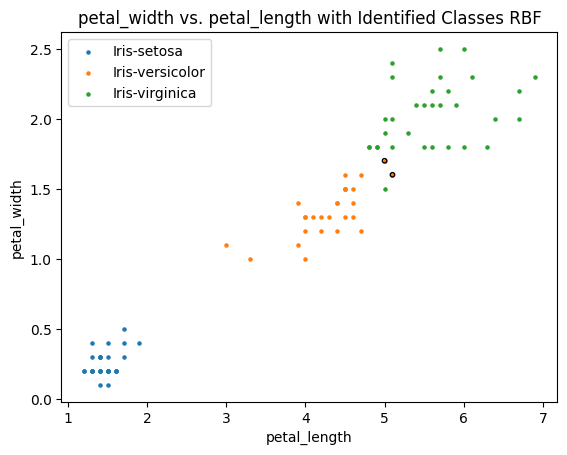

In [ ]:
Make_2D_Plot_with_Class_Identification(train_iris, 'petal_length', 'petal_width', 'type')

best_model_poly = tuning_output_poly.best_estimator_
for i in range(len(train_iris)):
  observation_data = {'petal_length':  [train_iris['petal_length'][i]],
                      'petal_width': [train_iris['petal_width'][i]]}
  train_obs = pd.DataFrame(observation_data)
  observation_target =  train_iris['type'][i]
  if best_model_poly.predict(train_obs) != observation_target:
    plt.scatter(train_obs['petal_length'], train_obs['petal_width'], color = 'black', facecolors='none', s = 10)

In [ ]:
#RBF
parameters = {'kernel': ['rbf'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.5, 1, 5, 10]}
est = svm.SVC()
tuning = GridSearchCV(est, parameters, cv = 5)
tuning_output_rbf = tuning.fit(train_predictor_variables, train_iris['type'])
tuning_output_rbf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

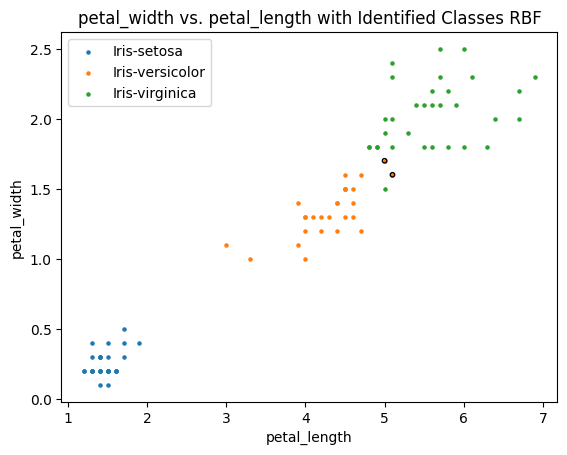

In [ ]:
Make_2D_Plot_with_Class_Identification(train_iris, 'petal_length', 'petal_width', 'type')

best_model_rbf = tuning_output_rbf.best_estimator_
for i in range(len(train_iris)):
  observation_data = {'petal_length': [train_iris['petal_length'][i]],
                      'petal_width': [train_iris['petal_width'][i]]}
  train_obs = pd.DataFrame(observation_data)
  observation_target =  train_iris['type'][i]
  if best_model_rbf.predict(train_obs) != observation_target:
    plt.scatter(train_obs['petal_length'], train_obs['petal_width'], color = 'black', facecolors='none', s = 10)

For predictor profile with all 4 predictors


In [ ]:
#Linear
train_predictor_variables_all = train_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

parameters = {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
est = svm.SVC()
tuning = GridSearchCV(est, parameters, cv = 5)
tuning_output_linear2 = tuning.fit(train_predictor_variables_all, train_iris['type'])
tuning_output_linear2.best_params_

{'C': 10, 'kernel': 'linear'}

In [ ]:
#Polynomial
train_predictor_variables_all = train_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
parameters = {'kernel': ['poly'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'degree': [2, 3, 4]}
est = svm.SVC()
tuning = GridSearchCV(est, parameters, cv = 5)
tuning_output_poly2 = tuning.fit(train_predictor_variables_all, train_iris['type'])
tuning_output_poly2.best_params_

{'C': 10, 'degree': 2, 'kernel': 'poly'}

In [ ]:
train_predictor_variables_all = train_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
parameters = {'kernel': ['rbf'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.5, 1, 5, 10]}
est = svm.SVC()
tuning = GridSearchCV(est, parameters, cv = 5)
tuning_output_rbf2 = tuning.fit(train_predictor_variables_all, train_iris['type'])
tuning_output_rbf2.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Model Assessment:Report the classification matrix on the test data.Report the misclassification rate. 2 Predictors

In [ ]:
#Linear
test_predictor_variables = test_iris[['petal_length', 'petal_width']]
model=tuning_output_linear.best_estimator_

classifications = best_model_linear.predict(test_predictor_variables)
data = {'Actual': test_iris['type'],
        'Predictions': classifications}
df = pd.DataFrame(data)
pd.crosstab(df['Actual'], df['Predictions'])
class_matrix_linear = pd.crosstab(df['Actual'], df['Predictions'])
class_matrix_linear
#5/60=8.33%

Predictions,Iris-setosa,Iris-versicolor,Iris-virginica
Actual,,,
Iris-setosa,20,0,0
Iris-versicolor,0,21,1
Iris-virginica,0,4,14


In [ ]:
#Polynomial

model2=tuning_output_poly.best_estimator_

classifications = model2.predict(test_predictor_variables)
data = {'Actual': test_iris['type'],
        'Predictions': classifications}
df = pd.DataFrame(data)
pd.crosstab(df['Actual'], df['Predictions'])
class_matrix_poly = pd.crosstab(df['Actual'], df['Predictions'])
class_matrix_poly
#2/60=3.33%

Predictions,Iris-setosa,Iris-versicolor,Iris-virginica
Actual,,,
Iris-setosa,20,0,0
Iris-versicolor,0,21,1
Iris-virginica,0,1,17


In [ ]:
#RBF
model3=tuning_output_rbf.best_estimator_

classifications = model3.predict(test_predictor_variables)
data = {'Actual': test_iris['type'],
        'Predictions': classifications}
df = pd.DataFrame(data)
pd.crosstab(df['Actual'], df['Predictions'])
class_matrix_rbf = pd.crosstab(df['Actual'], df['Predictions'])
class_matrix_rbf
#2/60=3.33%

Predictions,Iris-setosa,Iris-versicolor,Iris-virginica
Actual,,,
Iris-setosa,20,0,0
Iris-versicolor,0,21,1
Iris-virginica,0,1,17


Model Assessment 4 Predictors

In [ ]:
#Linear
test_predictor_variables_all = test_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
model_all_linear=tuning_output_linear2.best_estimator_

classifications = model_all_linear.predict(test_predictor_variables_all)
data = {'Actual': test_iris['type'],
        'Predictions': classifications}
df = pd.DataFrame(data)
pd.crosstab(df['Actual'], df['Predictions'])
class_matrix_linear2 = pd.crosstab(df['Actual'], df['Predictions'])
class_matrix_linear2

Predictions,Iris-setosa,Iris-versicolor,Iris-virginica
Actual,,,
Iris-setosa,20,0,0
Iris-versicolor,0,19,3
Iris-virginica,0,1,17


In [ ]:
#Polynomial

model_all_poly=tuning_output_poly2.best_estimator_

classifications = model_all_poly.predict(test_predictor_variables_all)
data = {'Actual': test_iris['type'],
        'Predictions': classifications}
df = pd.DataFrame(data)
pd.crosstab(df['Actual'], df['Predictions'])
class_matrix_poly2 = pd.crosstab(df['Actual'], df['Predictions'])
class_matrix_poly2

Predictions,Iris-setosa,Iris-versicolor,Iris-virginica
Actual,,,
Iris-setosa,20,0,0
Iris-versicolor,0,19,3
Iris-virginica,0,1,17


In [ ]:
#RBF
model_all_rbf=tuning_output_rbf2.best_estimator_

classifications = model_all_rbf.predict(test_predictor_variables_all)
data = {'Actual': test_iris['type'],
        'Predictions': classifications}
df = pd.DataFrame(data)
pd.crosstab(df['Actual'], df['Predictions'])
class_matrix_rbf2 = pd.crosstab(df['Actual'], df['Predictions'])
class_matrix_rbf2

Predictions,Iris-setosa,Iris-versicolor,Iris-virginica
Actual,,,
Iris-setosa,20,0,0
Iris-versicolor,0,20,2
Iris-virginica,0,1,17
